<a href="https://colab.research.google.com/github/kevinball02/HUFS-ML-Project/blob/master/knn_Classification_KYH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="Intro">Introduction<a name>
---

![Fake Bill](https://upload.wikimedia.org/wikipedia/commons/2/23/US_one_dollar_bill%2C_obverse%2C_series_2009.jpg)  
Reference: https://upload.wikimedia.org/wikipedia/commons/2/23/US_one_dollar_bill%2C_obverse%2C_series_2009.jpg

[Fake Bills](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills) (클릭시 웹사이트로 이동)

Dataset 정보:

* 1500 rows, 7 columns.  
  i.e. 1500 samples, 7 features.  

각 feature의 dtype:

|||||||||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|***features***|is_genuine|diagonal|height_left|height_right|margin_low|margin_upper|length|
|***dtype***|boolean|float64|float64|float64|float64|float64|float64|

목적:

* kNN imputer로 결측치 예상.

* Grid Search로 kNN 분류 모델의 최적 hyper-parameter 얻기.

* 최적의 모델에 대한 Evaluation.

# <a name="up">Procedure<a name>
---

0. [Basic Settings](#content0)

1. [Target에 대한 One-Hot Encoding.](#content1)

2. [Missing Values](#content2)

3. [Exploratory Data Analysis](#content3)

4. [Train/Test Dataset](#content4)

5. [Standardization](#content5)

6. [Grid Search](#content6)

7. [Evaluation](#content7)

Procedure의 각 컨텐츠명을 클릭하여 컨텐츠로 이동할 수 있다.  
또, 컨텐츠에서 번호를 누르면 다시 Procedure로 돌아온다.

가령, "Basic Settings"를 클릭하면 그 컨텐츠로 이동하고,  
"0."을 클릭하면 다시 Procedure로 돌아온다.

## [0.](#up) <a name="content0">Basic Settings<a name>
---

1) 시각화 라이브러리용 한글 폰트 설치.

In [1]:
# 한글 '나눔' 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 이 코드를 실행하고, '런타임 다시 시작'을 진행하자.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

2) 라이브러리 호출 및 간단한 확인.

In [1]:
""" 라이브러리 호출 """

# Basic 
#import time
#import random
#import math

# Data 분석
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Math
#import scipy as sp
#import statsmodels.api as sm

# Web Crawling
#import requests
#from bs4 import BeautifulSoup

# Visualization
import matplotlib as mpl
#import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
#from pandas.plotting import parallel_coordinates

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')  # Colab의 한글 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# Preprocessing
#from sklearn.preprocessing import OneHotEncoder # pd.get_dummies로 대체함.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler as mms

# Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Grid Search
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

Figure(1000x250)


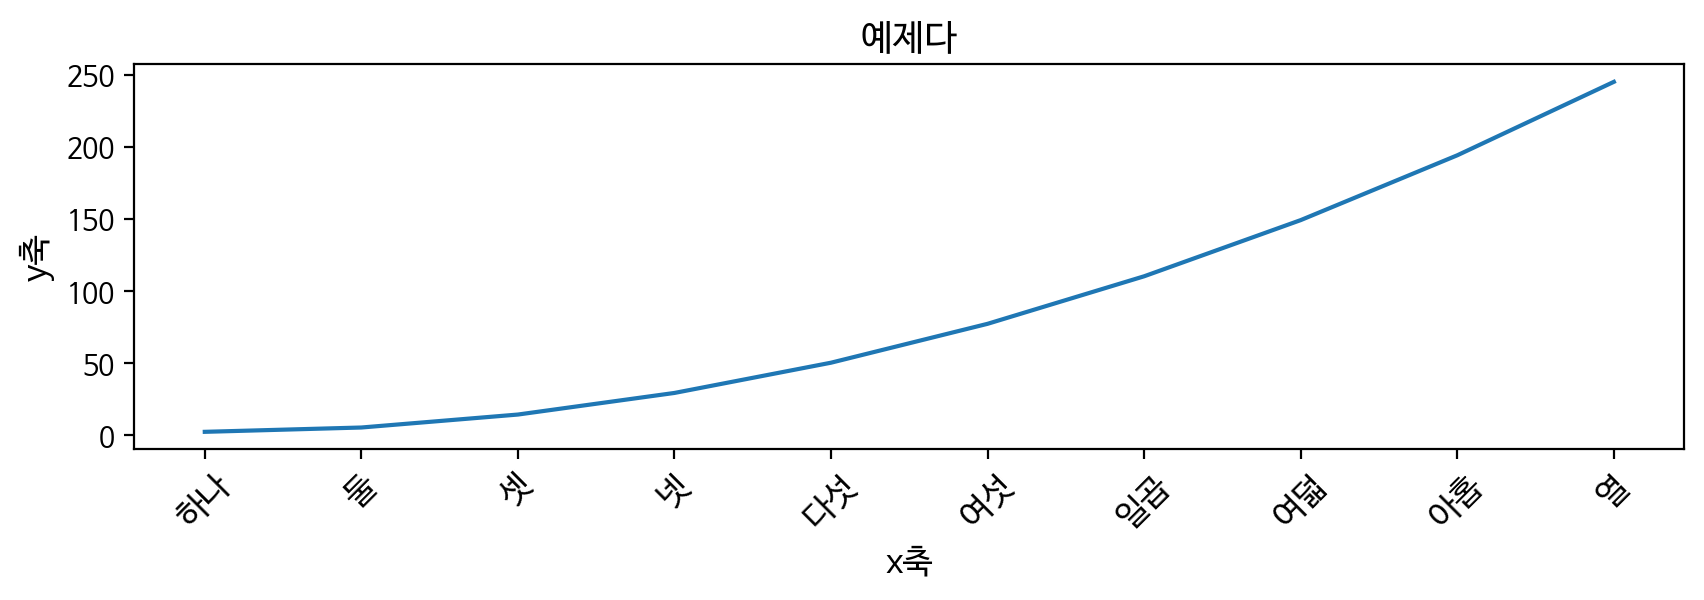

In [2]:
# Matplotlib 설정을 확인하는 예제 (stateless API)

# 데이터 준비
X = [x for x in range(0, 10)]
Y = [(3*y**2)+2 for y in range(0, 10)]
xticks_label = ['하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열']

# fig_ex(figure 객체) 생성
fig_ex, ax = plt.subplots(figsize=(10, 2.5))

# 그래프 그리기
ax.plot(X, Y)
ax.set_title("예제다", fontsize= 13)
ax.set_xlabel("x축", fontsize= 12)
ax.set_xticks(np.arange(0, 10, 1), xticks_label, fontsize= 12, rotation= 45)
ax.set_ylabel("y축", fontsize= 12)

print(fig_ex)

4) Github에서 fake_bills.csv 가져오기.

In [3]:
url = "https://raw.githubusercontent.com/kevinball02/HUFS-ML-Project/master/fake_bills.csv"
raw_data = pd.read_csv(url, sep= ";")
# 잘 불러왔는지 확인한다.
print(raw_data.head())
print(raw_data.tail())

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63

위에서 생성한 raw_data를 간단히 살펴보자.

In [4]:
# 전체적인 데이터 구성
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
# "is_genuine" (boolean) 칼럼의 정보 살펴보기
print(raw_data["is_genuine"].value_counts())

True     1000
False     500
Name: is_genuine, dtype: int64


In [6]:
# 기초 통계량 확인
raw_data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


[[<Axes: title={'center': 'diagonal'}>
  <Axes: title={'center': 'height_left'}>]
 [<Axes: title={'center': 'height_right'}>
  <Axes: title={'center': 'margin_low'}>]
 [<Axes: title={'center': 'margin_up'}>
  <Axes: title={'center': 'length'}>]]


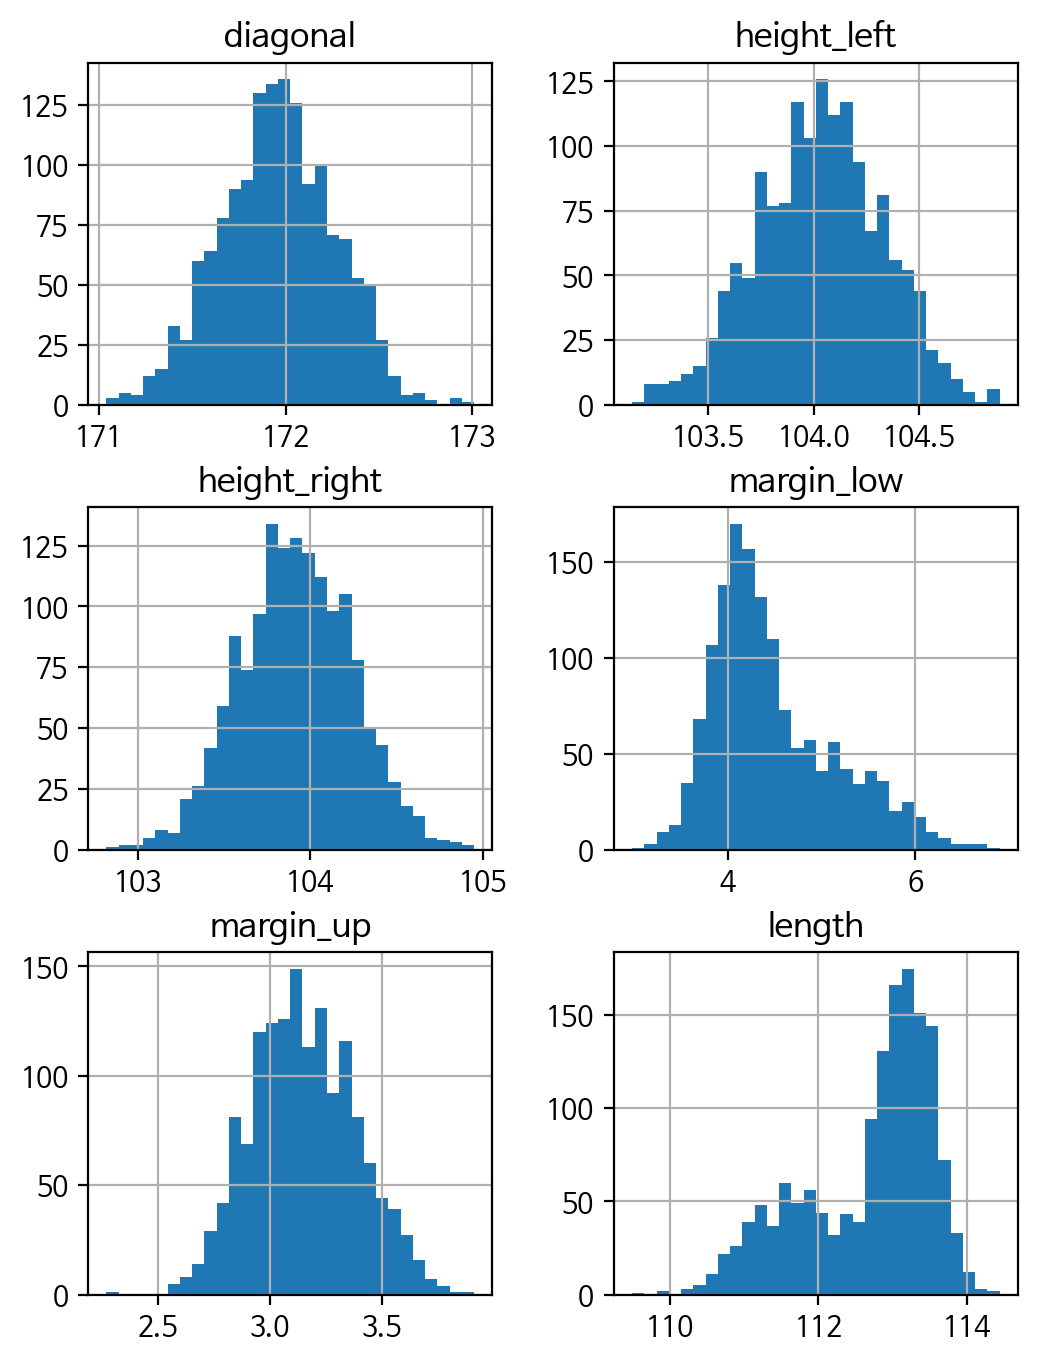

In [7]:
# 각 칼럼에 대한 히스토그램 확인
fig1 = raw_data.hist(figsize=(6,8), bins=30)
print(fig1)

## [1.](#up) <a name="content1">One-Hot Encoding<a name>
---

 이 문제에서 고려하는 target value는 "is_genuine" 칼럼의 True/False이다.  
따라서, 해당 칼럼을 추출하여 one-hot encoding 하자.

In [8]:
y = pd.get_dummies(raw_data["is_genuine"])
y # 추후 Train/Test set을 나눌 때 사용된다.

,False,True
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1495,1,0
1496,1,0
1497,1,0
1498,1,0


## [2.](#up) <a name="content2">Missing Values<a name>
---

"margin_low" feature에 결측치 37개가 있다.  
missingno 모듈을 사용해 결측치를 확인하고,  
kNN Imputer로 결측치를 채우자.
```python
# 아래를 사용하여 결측치를 확인하자.
import missingno as msno
msno.matrix(data)
msno.bar(data)
```

Axes(0.125,0.11;0.698618x0.77)


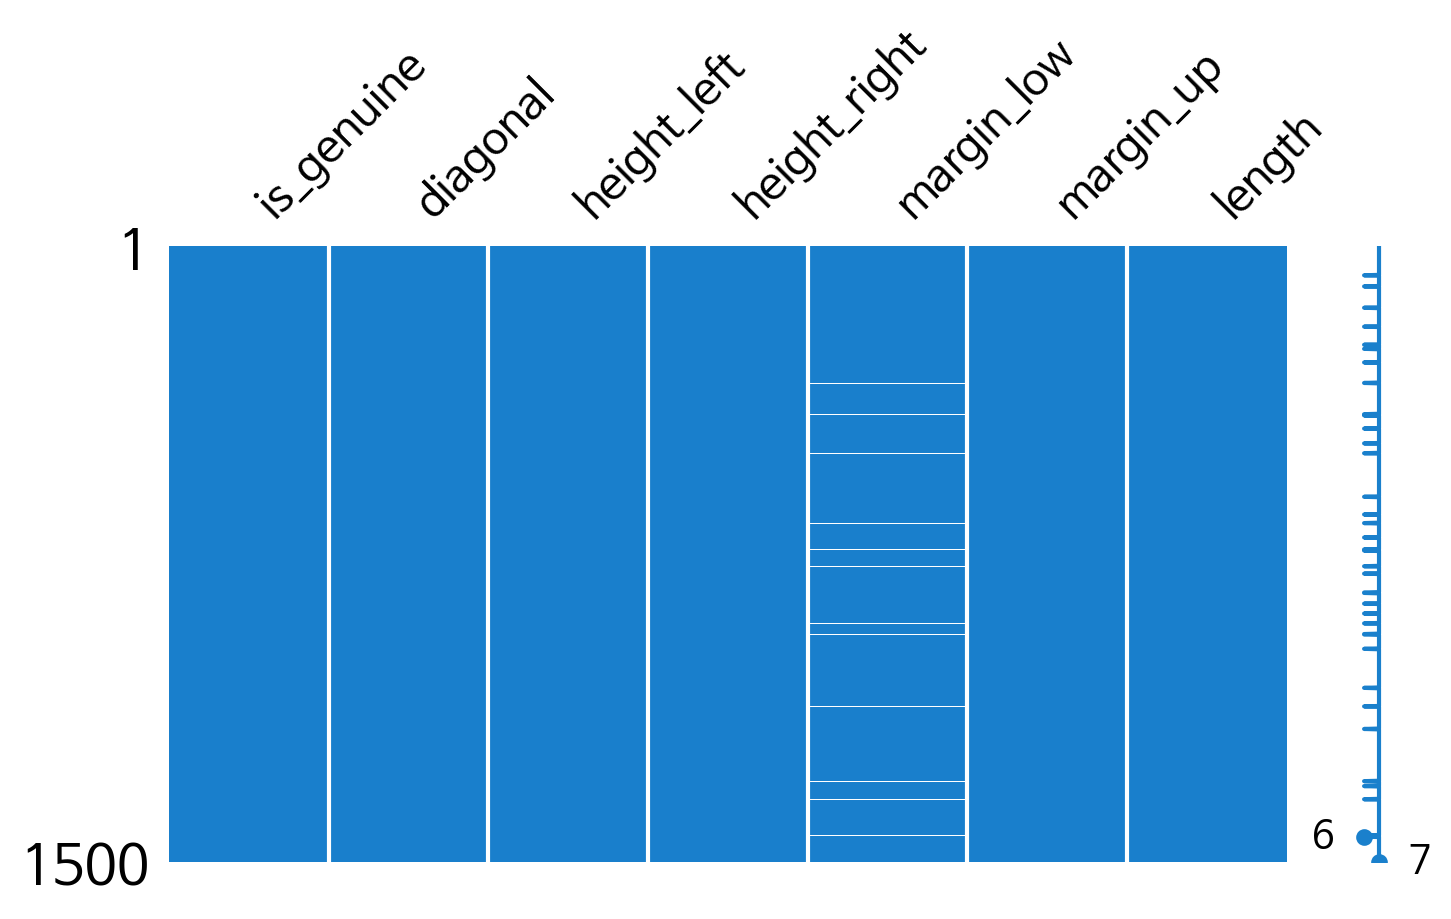

In [9]:
import missingno as msno 

fig2 = msno.matrix(df=raw_data, color=(0.1, 0.5, 0.8), figsize=(8,4))
print(fig2)

Axes(0.125,0.11;0.775x0.77)


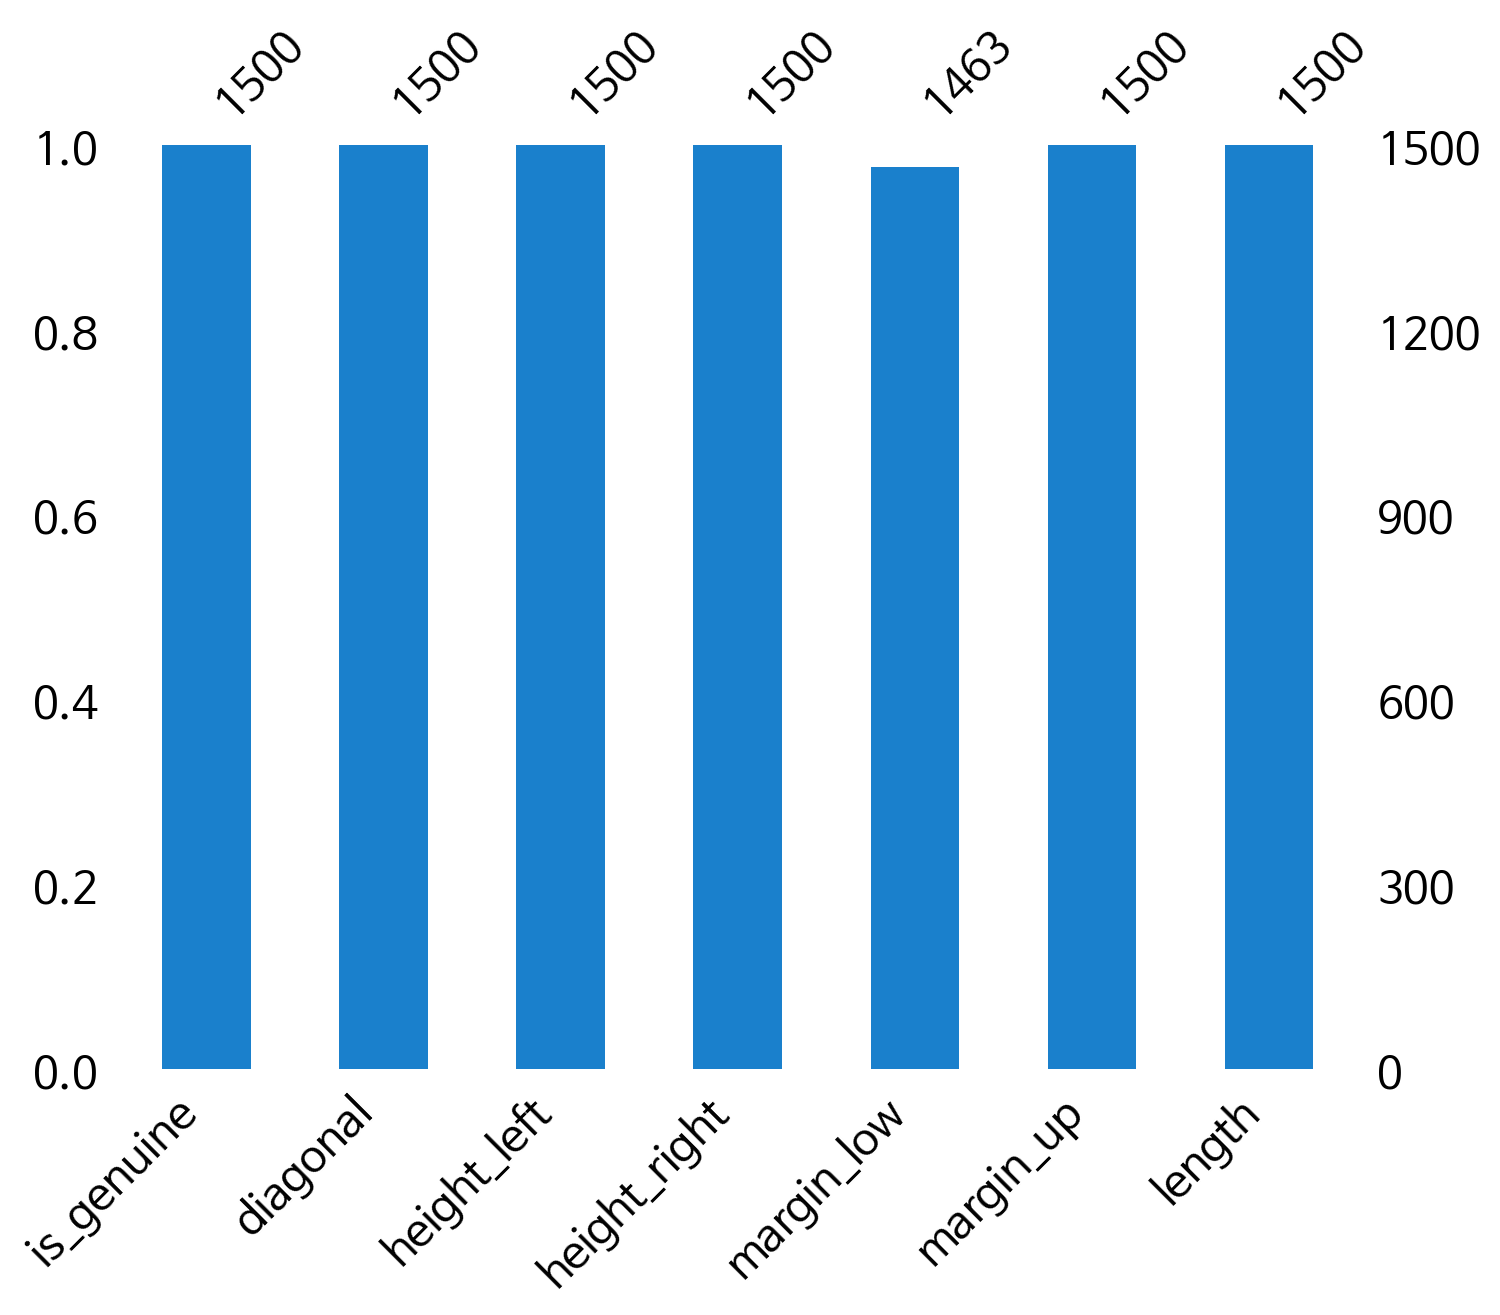

In [10]:
fig3 = msno.bar(df=raw_data, color=(0.1, 0.5, 0.8), figsize=(8,6))
print(fig3)

In [11]:
raw_data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Axes(0.125,0.11;0.62x0.77)


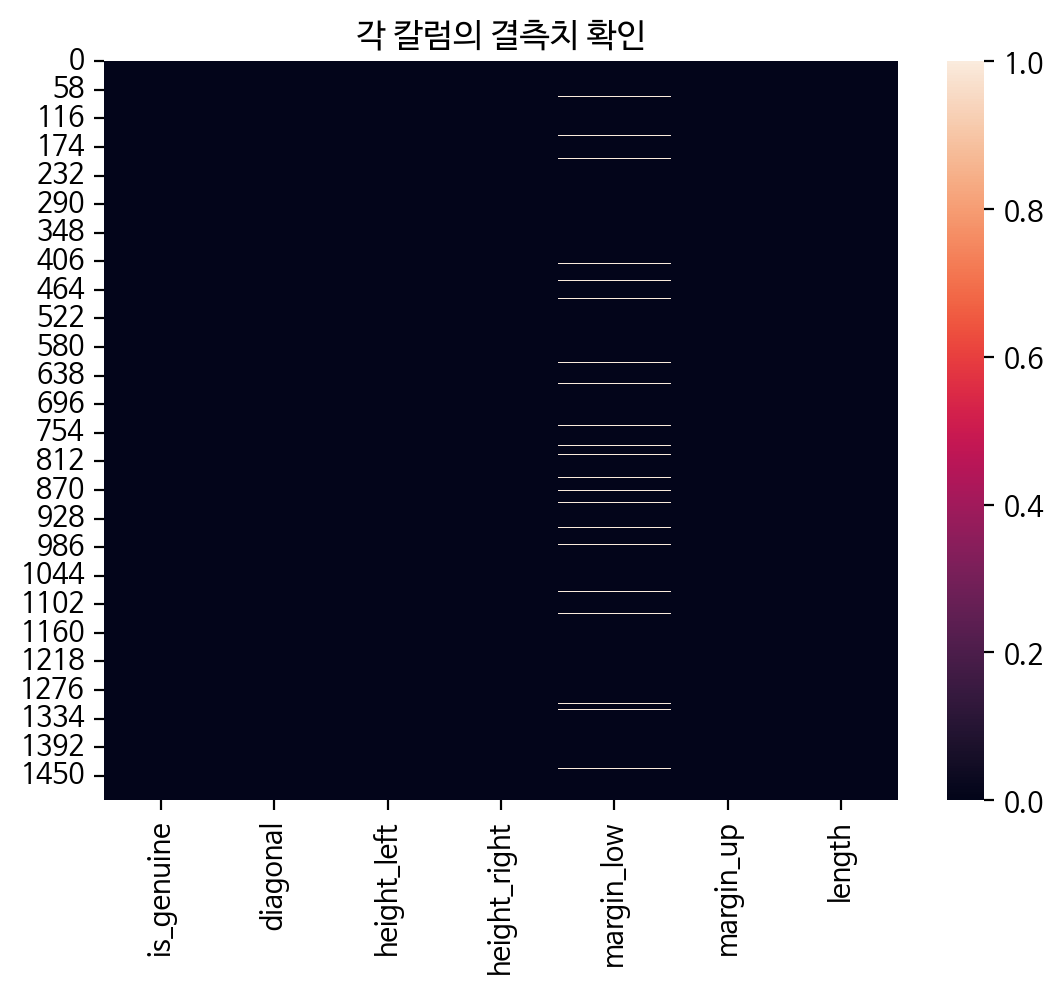

In [12]:
fig4 = sns.heatmap(raw_data.isnull())
fig4.set_title("각 칼럼의 결측치 확인")
print(fig4)

위의 코드에서, missingno.matrix/bar 및 seaborn.heatmap 메소드를 통해  
margin_low 칼럼에 37개의 결측치가 있음을 확인할 수 있다.  
이 float 결측치를 kNN으로 채워 넣자.

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

df_kNN_imputed = imputer.fit_transform(raw_data)
df_imp = pd.DataFrame(df_kNN_imputed, columns=raw_data.columns)

In [14]:
df_imp

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


방금의 코드로, raw_data의 결측치가 채워진 DataFrame, df_imp을 생성했다.  
실제로 결측치가 어떻게 채워졌는지 확인해보자.

In [15]:
df_null_series = raw_data["margin_low"][raw_data["margin_low"].isnull()]
# boolean indexing으로 결측치 Series를 생성했다.
df_imputed_series = df_imp["margin_low"][df_null_series.index]
# 결측치 Series의 Index를 가져와 df_imp를 slicing했다.
print(df_imputed_series)

72      3.940
99      4.190
151     3.995
197     4.520
241     4.290
251     4.245
284     3.990
334     4.520
410     4.080
413     3.945
445     4.125
481     4.380
505     3.975
611     4.000
654     3.885
675     4.205
710     4.070
739     4.290
742     4.080
780     4.575
798     4.270
844     4.420
845     4.340
871     4.030
895     4.380
919     4.275
945     4.280
946     4.340
981     4.430
1076    5.285
1121    5.660
1176    5.015
1303    5.485
1315    5.800
1347    5.035
1435    5.055
1438    5.870
Name: margin_low, dtype: float64


## [3.](#up) <a name="content3">Exploratory Data Analysis (EDA)<a name>
---

자료를 확인하자.
   ```python
   # 예시
   import numpy as np
   import seaborn as sns

   sns.pairplot(data=data, hue="is_genuine")
   sns.heatmap(data.corr())
   # ... (and so on)
   ```

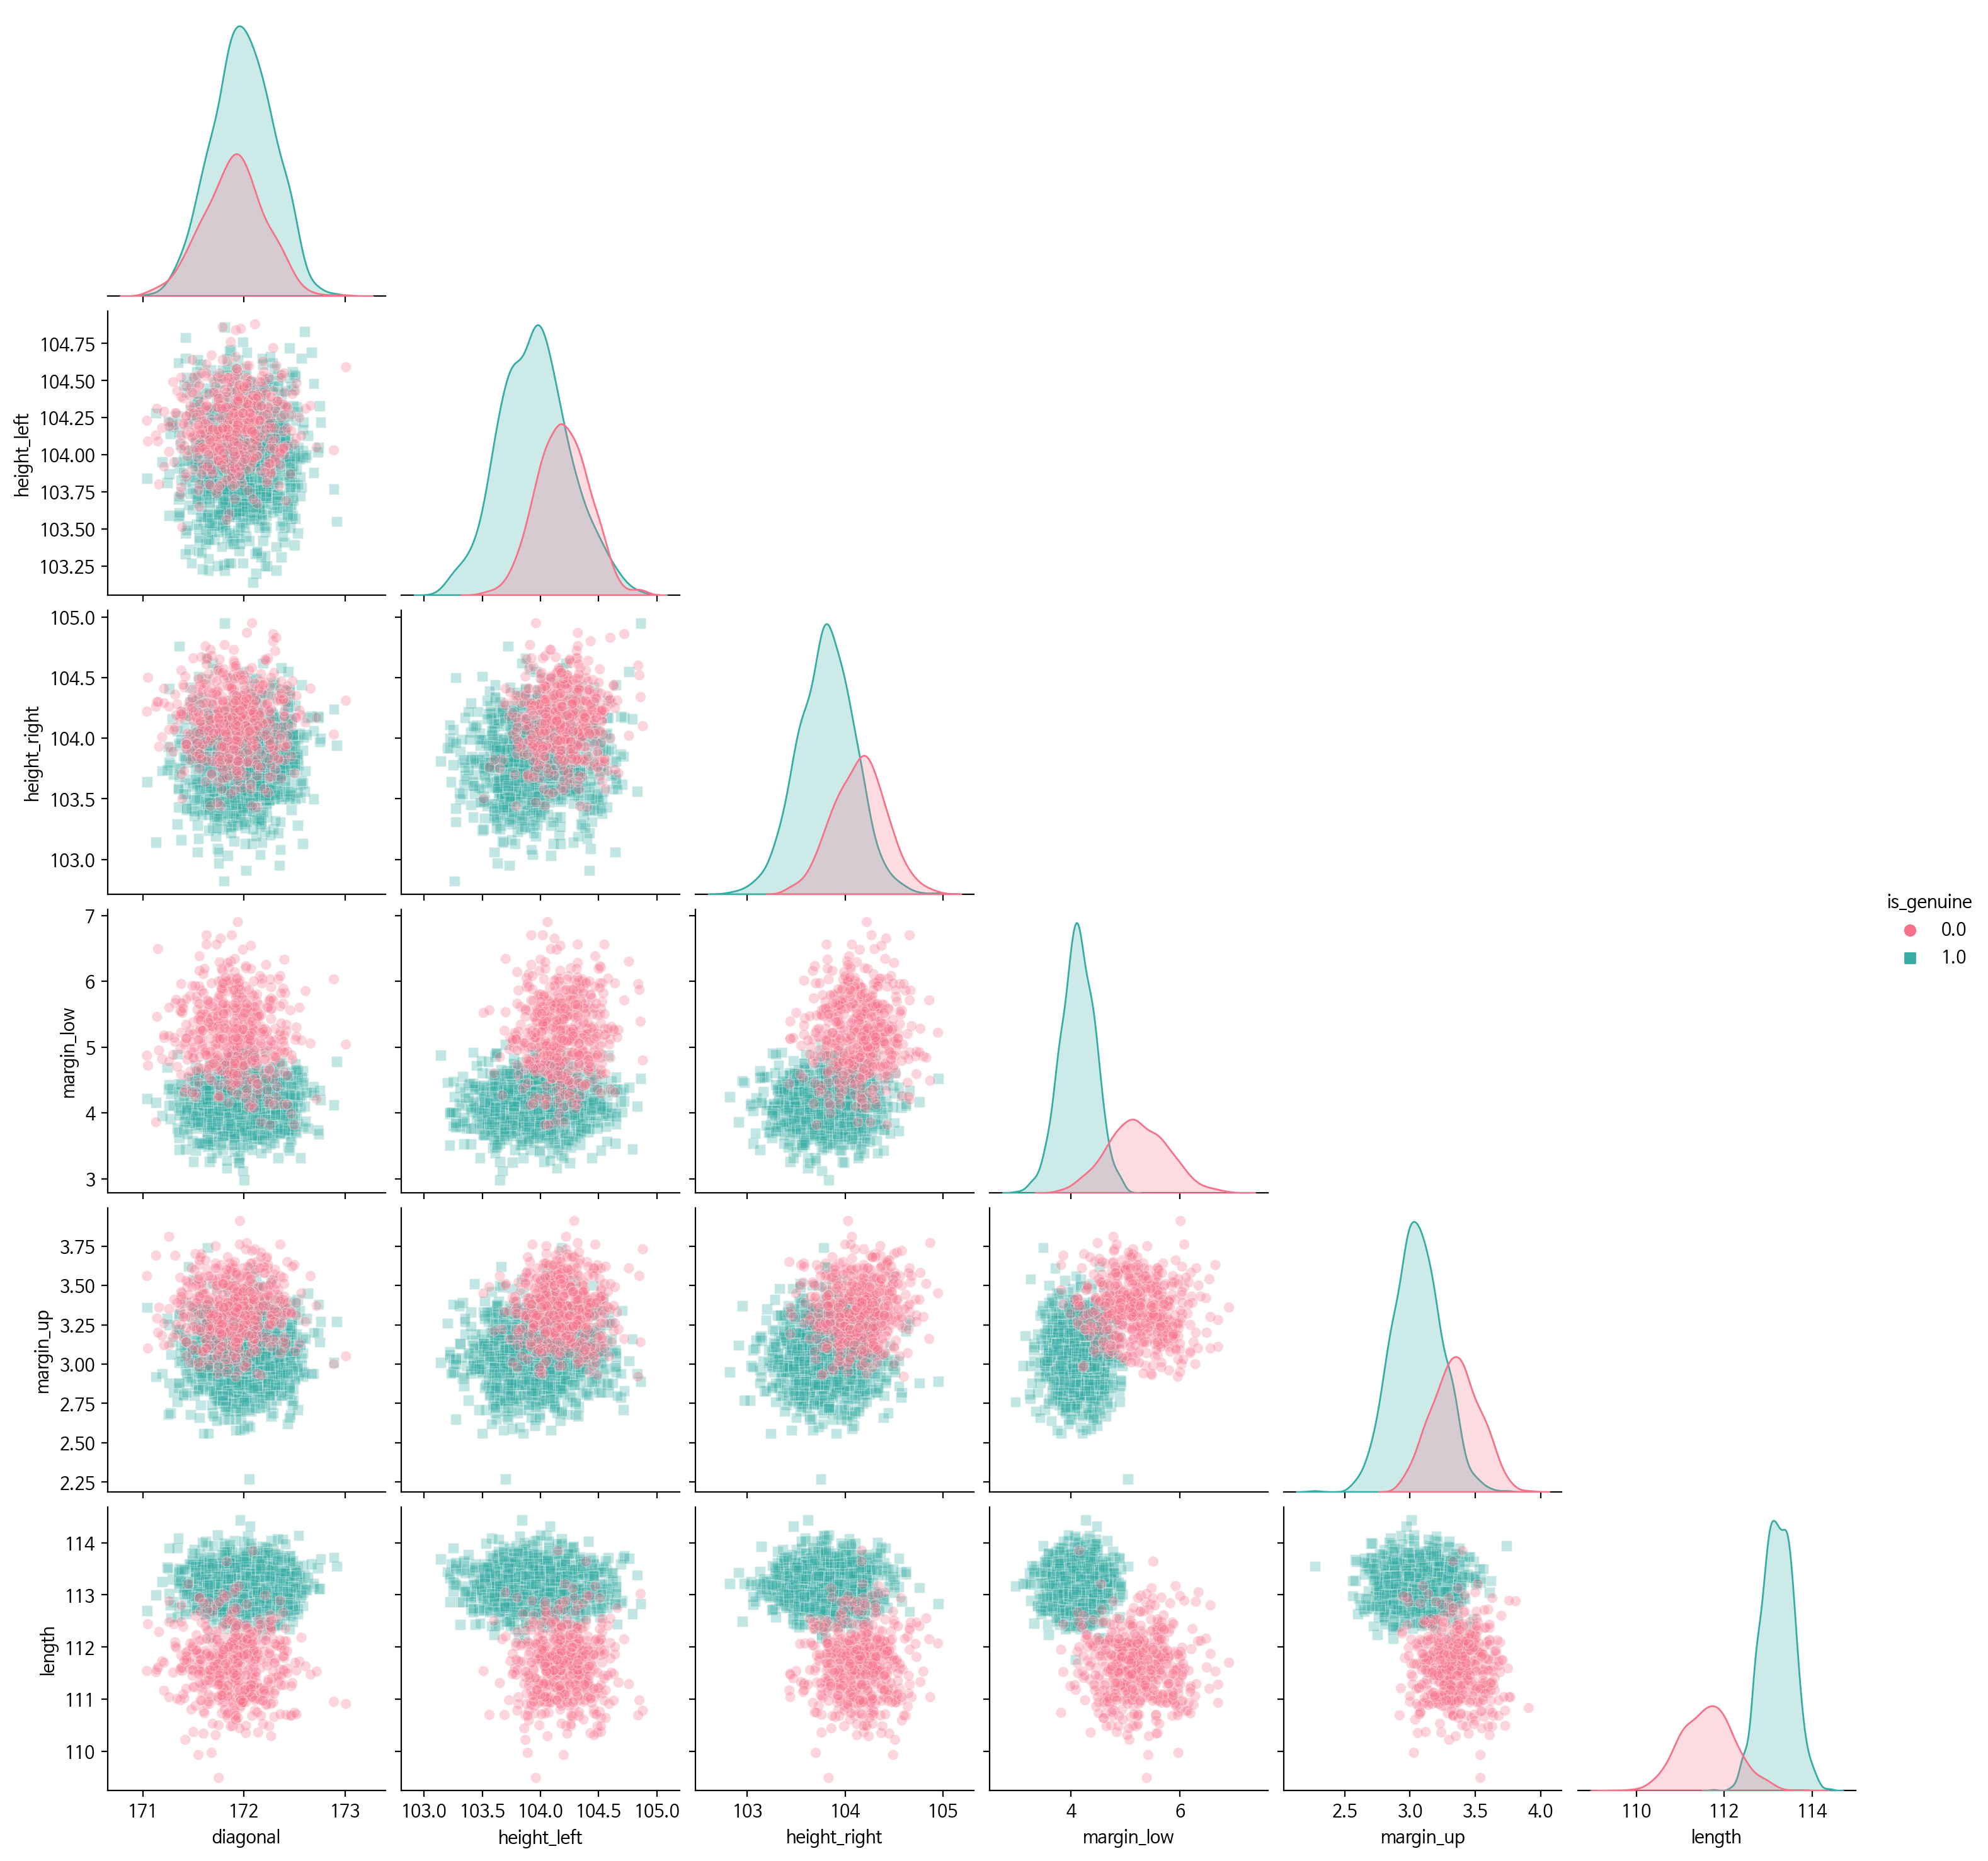

In [16]:
fig5 = sns.pairplot(data=df_imp, hue='is_genuine', 
                    palette='husl', markers=['o','s'], 
                    corner=True, plot_kws={'alpha': 0.3})
print(fig5)

Axes(0.125,0.11;0.62x0.77)


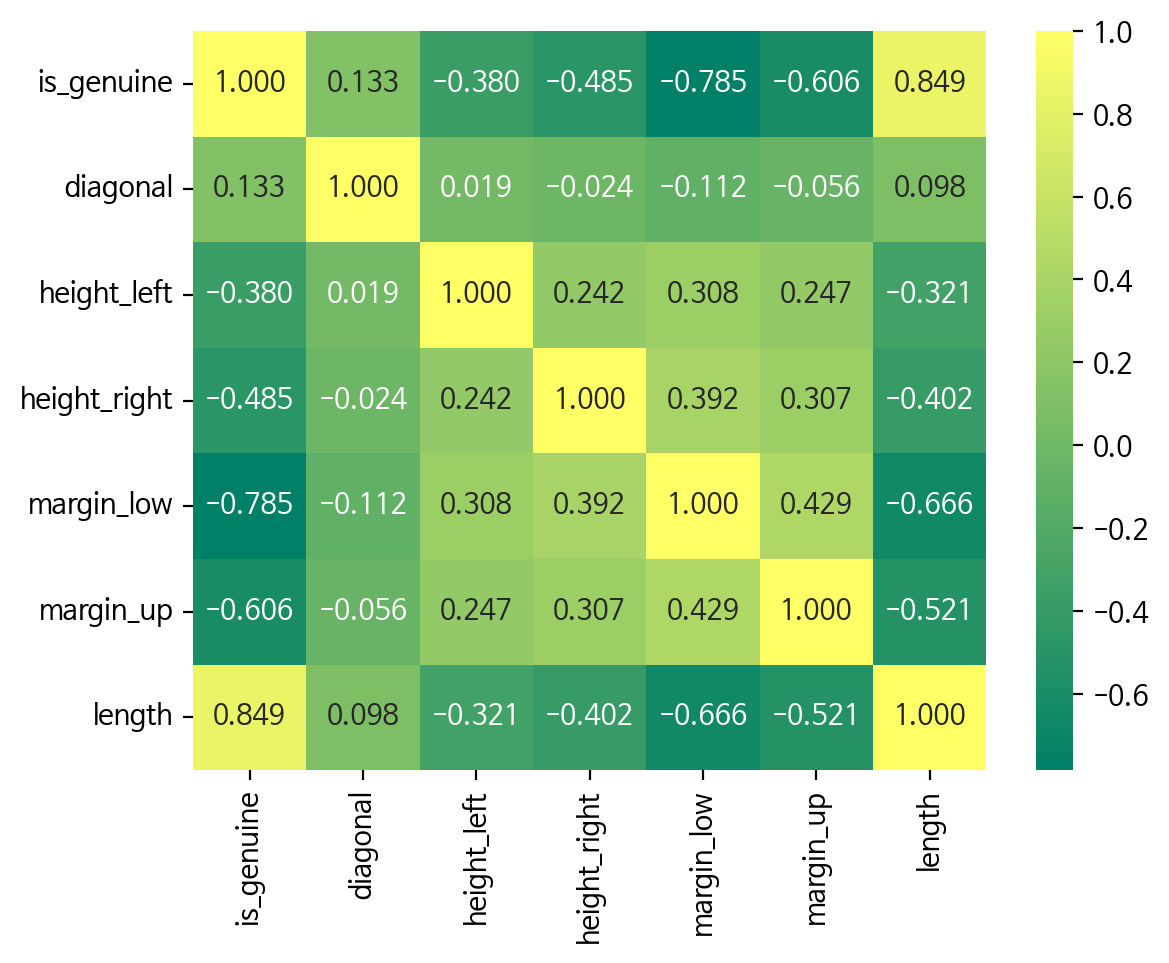

In [17]:
fig6 = sns.heatmap(df_imp.corr(),cmap='summer',annot=True,fmt="0.3f")
print(fig6)

## [4.](#up) <a name="content4">Train/Test Dataset<a name>
---

자료를 train dataset/test dataset으로 구분하자.  
(stratify 옵션도 사용하자.)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df_imp.iloc[:,1:], y[False], stratify=y[False], random_state=3)

In [19]:
X_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
1238,172.27,103.88,104.16,5.91,3.31,110.91
498,171.76,104.01,103.68,4.07,2.75,112.81
801,172.19,103.84,104.62,4.14,3.21,113.45
756,171.72,103.95,104.11,3.75,3.13,113.51
224,172.12,103.20,103.92,4.46,3.26,113.44


In [20]:
X_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
725,171.73,103.60,103.34,3.82,3.15,112.89
1257,172.39,104.34,104.10,5.89,3.14,111.56
1189,172.18,104.53,104.14,5.97,3.18,111.11
120,171.92,103.78,103.61,4.02,3.31,112.91
738,171.70,103.88,103.56,3.89,3.03,113.60


## [5.](#up) <a name="content5">Standardization<a name>

StandardScaler를 이용하여 Standardization하자.

In [21]:
ss = StandardScaler()
X_train_s = pd.DataFrame(data= ss.fit_transform(X_train), columns= X_train.columns)
X_train_s.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.052656,-0.523408,0.739125,2.169253,0.703933,-2.048450
1,-0.644914,-0.087929,-0.746664,-0.628249,-1.749880,0.142968
2,0.786370,-0.657401,2.163006,-0.521822,0.265752,0.881129
3,-0.778056,-0.288919,0.584355,-1.114771,-0.084793,0.950332
4,0.553371,-2.801295,-0.003770,-0.035300,0.484842,0.869595


In [22]:
X_test_s = pd.DataFrame(data= ss.transform(X_test), columns= X_test.columns)
X_test_s.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.744771,-1.461361,-1.799098,-1.008344,0.002843,0.235238
1,1.452084,1.017516,0.553401,2.138846,-0.040975,-1.298754
2,0.753085,1.653984,0.677217,2.260476,0.134298,-1.817774
3,-0.112343,-0.858391,-0.963342,-0.704268,0.703933,0.258305
4,-0.844628,-0.523408,-1.118111,-0.901917,-0.522974,1.054136


In [23]:
y_train.describe()

count    1125.000000
mean        0.333333
std         0.471614
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: False, dtype: float64

In [24]:
y_test.describe()

count    375.000000
mean       0.333333
std        0.472034
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: False, dtype: float64

임의의 Standard-Scaled kNN Model을 만들자.

In [25]:
def print_metrics(model, X_train):
  """교차 검증 점수와 정확도를 모두 출력하는 함수"""
  scores = cross_val_score(model, X_train, y_train, cv=10)
  print('*** Cross val score *** \n   {}'.format(scores))
  print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))
  #print('\n*** Confusion Matrix *** \n', confusion_matrix(y_train, model.predict(X_train)))

In [26]:
# 임의의 knn 분류 모델을 생성하였다. 
knn_s = KNeighborsClassifier()
knn_s.fit(X_train_s, y_train)
print_metrics(knn_s, X_train_s)

*** Cross val score *** 
   [0.99115044 0.99115044 0.98230088 0.98230088 1.         1.
 1.         0.99107143 1.         0.98214286]

*** Mean Accuracy *** 
   0.9920117


## [6.](#up) <a name="content6">Grid Search<a name>

Grid Search로 kNN 분류 모델의 최적 Hyper-Parameter를 찾자.  
(cv=10으로 옵션을 설정하여 10-fold Cross-Validation을 하자.)

In [27]:
# 아래의 hyper-parameter를 모두 확인할 것이다.
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [28]:
gs_s = GridSearchCV(knn_s, grid_params, cv=10)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score :  0.993781605562579
Best Test Score :  0.984


위에서 얻은 최적의 hyper-parameter, 각각  
'manhattan', 6, 'distance'를 적용하여,  
Final Model을 생성하자.

In [29]:
knn_s_final = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 6, weights = 'distance')
knn_s_final.fit(X_train_s, y_train)
print_metrics(knn_s_final, X_train_s)

*** Cross val score *** 
   [0.99115044 0.99115044 0.98230088 1.         1.         1.
 1.         0.99107143 0.99107143 0.99107143]

*** Mean Accuracy *** 
   0.9937816


## [7.](#up) <a name="content7">Evaluation<a name>

위에서 얻은 최적의 모델로 test-data set에 대한 score를 구하자.

In [30]:
def print_test_metrics(model, X_test):
  """Test 정확도와 Confusion Matrix를 출력하는 함수"""
  print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
  print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))

In [31]:
print_test_metrics(knn_s_final, X_test_s)

*** Test Accuracy *** 
   0.984

*** Confusion Matrix *** 
 [[248   2]
 [  4 121]]
